# **Final Project Report**

Shams Wardak, Igor Torrezan, Gregory Millan, Joseph Puchalla

## **Introduction**

The Washington Commanders have recently been sold to the Josh Harris Ownership Group, and with this change comes the opportunity to create a fresh start for the team. As part of this new beginning, the Commanders are rumored to be looking towards building a brand new stadium to replace the current FedEx field. Our group is determined to gather the necessary data to propose the best possible stadium project for the Washington Commanders organization. <br> <br>
To ensure we find the ideal location to build the new stadium, our group will review which state in the DMV region has the most fans. Once we decide which state is best suitable, we will then analyze which county in that state has the highest population. After determining the county, we will then investigate how much land is needed to build a stadium by reviewing how many acres every NFL stadium has. Using this information, we will then search for potential land/properties in the chosen county. <br> <br>
To finalize our research, we will utilize code to calculate and determine which available property in the chosen county is best suitable for a new state-of-the-art NFL stadium for the Washington Commanders. With this approach, we believe we can find the most optimal location for the new stadium, which will provide numerous benefits, including an improved brand image for the team, increased revenue streams, and ultimately making the Commanders more competitive on and off the field. We are confident that by using sufficient data, we can propose the best possible opportunity for the team.


## **Method**

**As we cleaned, preprocessed, and displayed the data, we left detailed descriptions on our methods to complete this project.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Our goal here is to determine which state/territory has the most Washington Commnaders fans in the DMV area in order to determine the best location for the new Washinthon Commanders stadium since the new ownership group is looking into building a new state of the art field that will attract fans and fill up games.

First we will import a csv file with data that gives us the general population of each state, and the amount of fans believed to be residing in each state as well.

In [2]:
df = pd.read_csv('CommandersFansInDMV.csv')

df.head()

,Virginia Population,Maryland Population,Washington dc population,Commanders fans in Maryland,Commanders fans in Virginia,Commanders fans in Washington dc
0,"8,709,873","6,154,710","631,693","1,100,000","1,600,000","183,191"


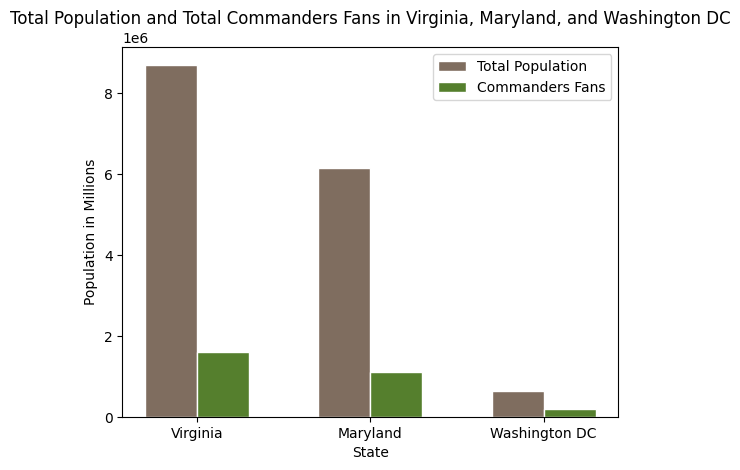

In [3]:
df = pd.read_csv('CommandersFansInDMV.csv')

df = df.replace(',','', regex=True)
df = df.astype(int)

fig, ax = plt.subplots()

bar_width = 0.3

r1 = [0, 1, 2]
r2 = [x + bar_width for x in r1]

ax.bar(r1, [df.loc[0, 'Virginia Population'], df.loc[0, 'Maryland Population'], df.loc[0, 'Washington dc population']],
       color='#7f6d5f', width=bar_width, edgecolor='white', label='Total Population')

ax.bar(r2, [df.loc[0, 'Commanders fans in Virginia'], df.loc[0, 'Commanders fans in Maryland'], df.loc[0, 'Commanders fans in Washington dc']],
       color='#557f2d', width=bar_width, edgecolor='white', label='Commanders Fans')

ax.set_xticks([r + bar_width / 2 for r in range(len(r1))])
ax.set_xticklabels(['Virginia', 'Maryland', 'Washington DC'])
ax.set_xlabel('State')
ax.set_ylabel('Population in Millions')
ax.set_title('Total Population and Total Commanders Fans in Virginia, Maryland, and Washington DC')
ax.legend()

plt.show()

After retracting the date from the csv, we decided to create a double bar graph that helps us visualize and compare the data more clearly. The first operation converts all commas in the DataFrame to an empty string, and then casts all values to integers. The code then uses matplotlib to create a bar chart showing the total population and the number of Commanders fans in each state. It creates a subplot, defines the width of the bars, and sets the position of the bars using r1 and r2. The ax.bar() function is then used twice to create two sets of bars. The first set of bars shows the total population in each state, while the second set of bars shows the number of Commanders fans in each state. The colors and labels for each set of bars are also defined. Afterwards we used ax.set to label the graph and plt.show() to finally create the visualization. 

As we can see from the graph above, Virginia has significantly more people and fans living in the state compared to both Maryland and Washington DC.

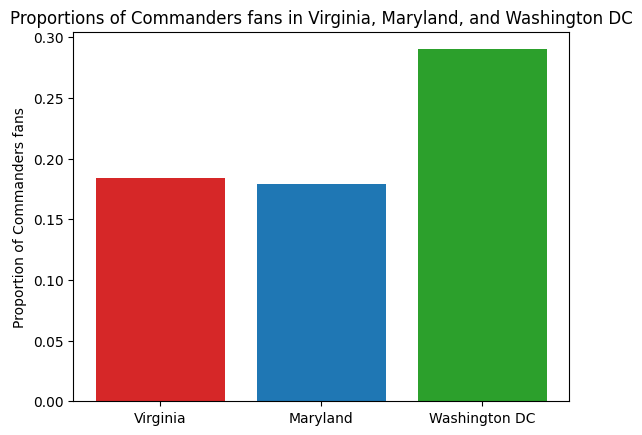

In [4]:
df = pd.read_csv('CommandersFansInDMV.csv')

df = df.replace(',','', regex=True)

df['Virginia fans proportion'] = int(float(df['Commanders fans in Virginia'])) / int(float(df['Virginia Population']))
df['Maryland fans proportion'] = int(float(df['Commanders fans in Maryland'])) / int(float(df['Maryland Population']))
df['Washington DC fans proportion'] = int(float(df['Commanders fans in Washington dc'])) / int(float(df['Washington dc population']))

colors = ['tab:red', 'tab:blue', 'tab:green']

fig, ax = plt.subplots()
ax.bar(['Virginia', 'Maryland', 'Washington DC'],
       [df.loc[0, 'Virginia fans proportion'],
        df.loc[0, 'Maryland fans proportion'],
        df.loc[0, 'Washington DC fans proportion']],
       color=colors)
ax.set_ylabel('Proportion of Commanders fans')
ax.set_title('Proportions of Commanders fans in Virginia, Maryland, and Washington DC')
plt.show()

It's always good to be 100% certain before accessing which state we will favor, so we decided to create a regular bar grapgh that shows the proportions of gen.population/fans. Like the previous code, we made the first operation replace all commas in the DataFrame with an empty string. The next three lines of code create three new columns in the DataFrame that calculate the proportion of Commanders fans in each state by dividing the number of Commanders fans by the total population of each state. The proportion is then stored as a new column in the DataFrame. The colors list is then created, which will be used to color the bars in the bar chart. The ax.bar() function is used to create a bar chart that shows the proportion of Commanders fans in each state. The x-axis labels are set to 'Virginia', 'Maryland', and 'Washington DC', and the y-axis values are set to the values of the new columns created earlier. We then label everything and create the graph using plt.show().

Looking at the graph, we can see Washington DC proportionally is greater than both Virginia and DC. Unfortunatly, taking the very low population into consideration, we decided that Virginia was still the heavy favorite to be the home of the new Washington Commanders stadium.

In [5]:
vacounty_df = pd.read_csv('virginia_county_data.csv')
vacounty_df.head()

,year,fips,pop2010,pop2023,state,stateCode,growthSince2010,name,ctyname,slug,landArea,density,StatePercentage,StateRank,densityMi,area
0,2023,51059,1081726,1170883,Virginia,VA,0.082421,Fairfax County,Fairfax County,fairfax-county-va,391,2994.585678,0.132717,1,2994.585678,391
1,2023,51153,402002,506264,Virginia,VA,0.259357,Prince William County,Prince William County,prince-william-county-va,336,1506.738095,0.057384,2,1506.738095,336
2,2023,51810,437994,465914,Virginia,VA,0.063745,Virginia Beach City County,Virginia Beach City County,virginia-beach-city-county-va,250,1863.656000,0.052810,3,1863.656000,250
3,2023,51107,312311,453554,Virginia,VA,0.452251,Loudoun County,Loudoun County,loudoun-county-va,516,878.980620,0.051409,4,878.980620,516
4,2023,51041,316236,379041,Virginia,VA,0.198602,Chesterfield County,Chesterfield County,chesterfield-county-va,423,896.078014,0.042964,5,896.078014,423


In this part of the program, we created a database from the dataset that we found from the Virginia website however, we implemented it on a github so it could have easier access when it comes to implementing the dataset. And got a fair amount of columns in the dataset that we can manipulate.

In [6]:
vacounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             133 non-null    int64  
 1   fips             133 non-null    int64  
 2   pop2010          133 non-null    int64  
 3   pop2023          133 non-null    int64  
 4   state            133 non-null    object 
 5   stateCode        133 non-null    object 
 6   growthSince2010  133 non-null    float64
 7   name             133 non-null    object 
 8   ctyname          133 non-null    object 
 9   slug             133 non-null    object 
 10  landArea         133 non-null    int64  
 11  density          133 non-null    float64
 12  StatePercentage  133 non-null    float64
 13  StateRank        133 non-null    int64  
 14  densityMi        133 non-null    float64
 15  area             133 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 16.8+ KB


Right here we are starting to prepare to clean the dataframe and look for anything that seems out of place and make sure that the data type for each portion is something that we work with if not then we would have to change the data type accordingly.

In [5]:
vacounty_df = vacounty_df.drop(['fips', 'stateCode', 'state', 'growthSince2010', 'name', 'slug','density', 'StatePercentage', 'StateRank', 'area'], axis=1)
vacounty_df

,year,pop2010,pop2023,ctyname,landArea,densityMi
0,2023,1081726,1170883,Fairfax County,391,2994.585678
1,2023,402002,506264,Prince William County,336,1506.738095
2,2023,437994,465914,Virginia Beach City County,250,1863.656000
3,2023,312311,453554,Loudoun County,516,878.980620
4,2023,316236,379041,Chesterfield County,423,896.078014
...,...,...,...,...,...,...
128,2023,5961,5671,Covington,5,1134.200000
129,2023,5190,4802,Craig County,330,14.551515
130,2023,4731,4053,Bath County,529,7.661626
131,2023,3958,3606,Norton,7,515.142857


What we did right after was remove the columns that we found were similar than other columns and removed columns that we feel we wouldn't find useful for the assignment and save it to the same dataframe to make sure that we did the according changes right.

In [6]:
vacounty_df = vacounty_df.sort_values('pop2023', ascending=True)
vacounty_df

,year,pop2010,pop2023,ctyname,landArea,densityMi
132,2023,2321,2205,Highland County,415,5.313253
131,2023,3958,3606,Norton,7,515.142857
130,2023,4731,4053,Bath County,529,7.661626
129,2023,5190,4802,Craig County,330,14.551515
128,2023,5961,5671,Covington,5,1134.200000
...,...,...,...,...,...,...
4,2023,316236,379041,Chesterfield County,423,896.078014
3,2023,312311,453554,Loudoun County,516,878.980620
2,2023,437994,465914,Virginia Beach City County,250,1863.656000
1,2023,402002,506264,Prince William County,336,1506.738095


For this portion of the program we decided to resort the values to see which county has the highest population count and wich once has the lowest. This will also help out when it comes to graphing the data

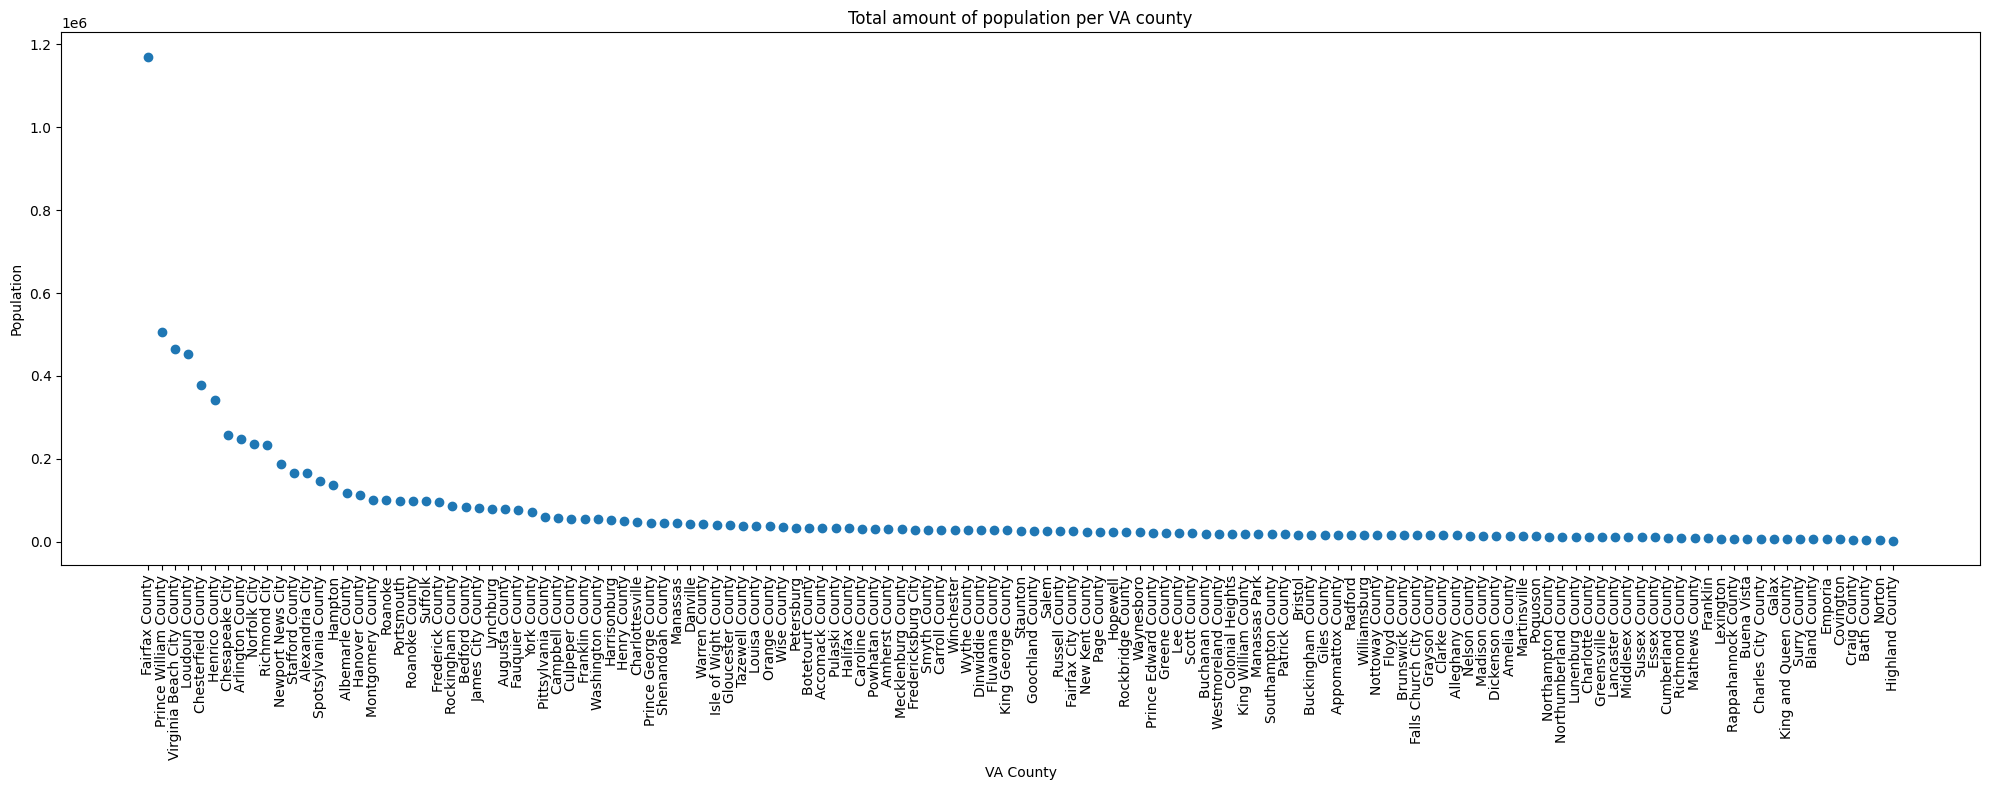

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(vacounty_df.ctyname, vacounty_df.pop2023)

ax.set_xlabel('VA County')
ax.set_ylabel('Population')
ax.set_title('Total amount of population per VA county')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

When it came to graphing the dataframe we grabbed the x and y value accordingly, Then we created a fig and ax so we can set the x and y labels and also change the figure size so it wouldn't look squished and instead make it seem more spread out. Then we rotated the xtick so all the x titles will be more readable and tighten the layout to make the whole x value titles more organized. Based on the result that we got in this graph, it shows that the highest county with the most population is going to be Fairfax County followed by Prince Williams, Virginia Beach, and Loudoun Chesterfield County

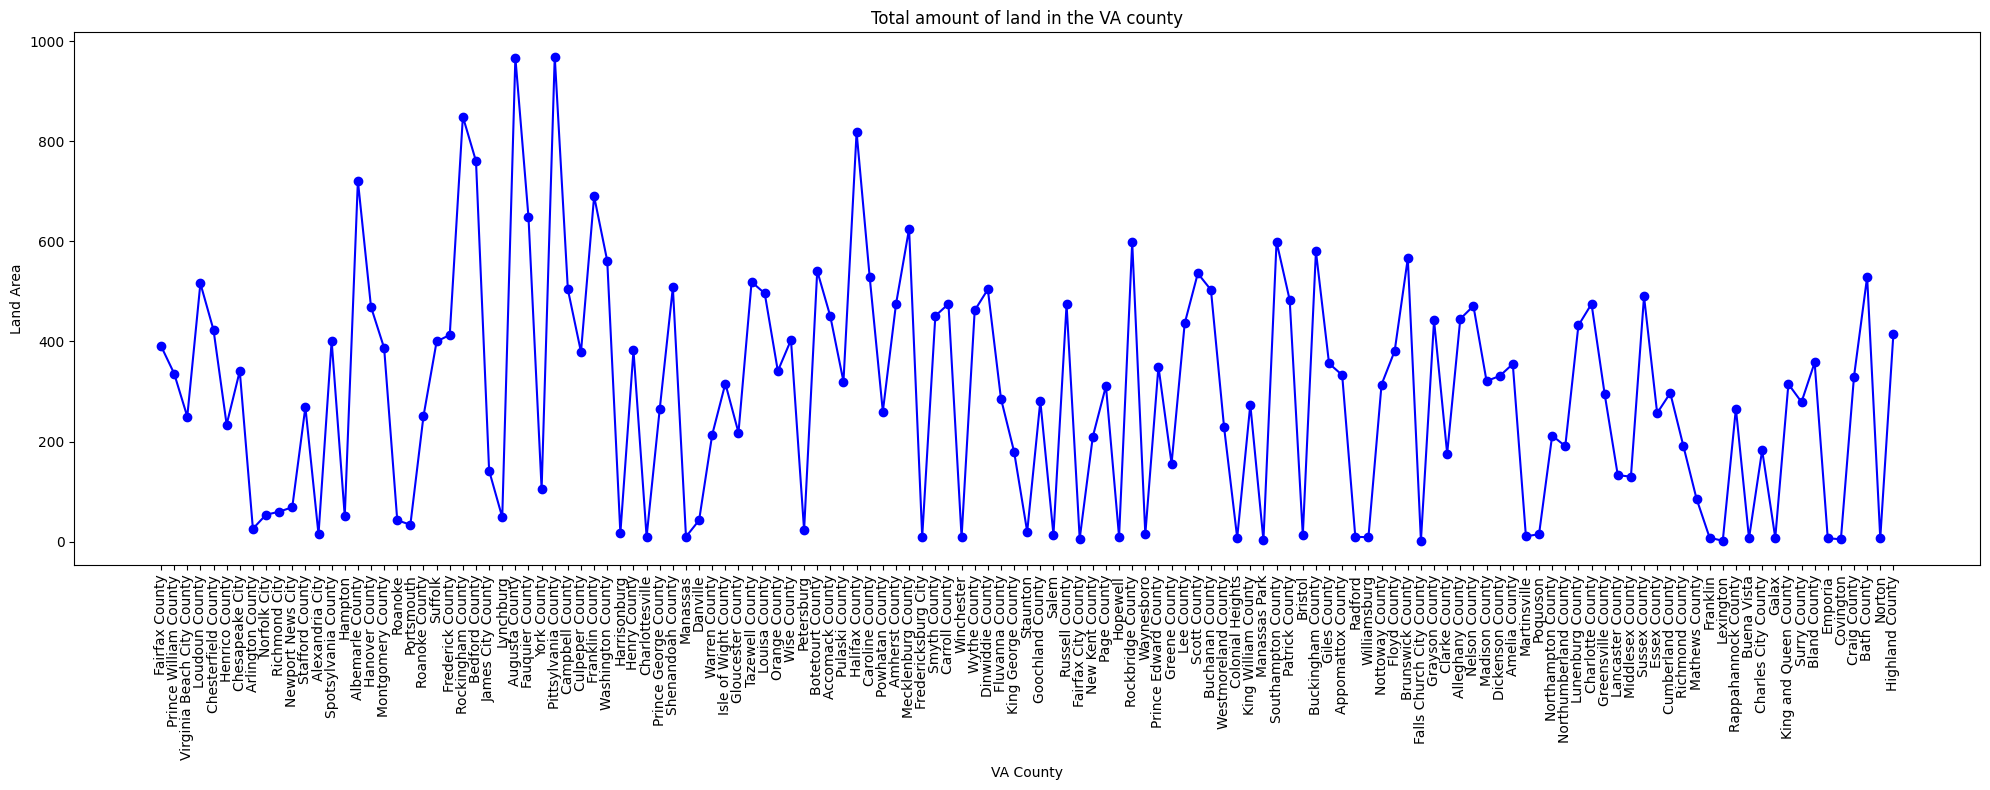

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(vacounty_df.ctyname, vacounty_df.landArea, marker='o', linestyle='-', color='blue')

ax.set_xlabel('VA County')
ax.set_ylabel('Land Area')
ax.set_title('Total amount of land in the VA county')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

For this portion we did very similar towards the graph above but the difference we made was making it a regular plot and setting the according values such as marker, linestyle, and color so that it would look more readable and appealing. Based on the results on this graph it shows that there are a few counties that have a high number of land area and a large amount of counties which land area are very small.

From the results above, we found that it would be best to build the stadium in Fairfax County. This is because they have the highest population. It also helps that Fairfax County is close to Washington DC.Other potential locations could be Prince Williams, Virginia Beach, and Loudoun Chesterfield County

Now that we know a good general location to build the stadium, lets take a look at the average acerage of NFL Stadiums. 

In [ ]:
stadiums_df = pd.read_csv('nfl_stadiums.csv')
stadiums_df.head()

,Team,Stadium,Acreage
0,Los Angeles Chargers,SoFi Stadium,298
1,Los Angeles Rams,SoFi Stadium,298
2,Washington Commanders,FedExField,207
3,Las Vegas Raiders,Allegiant Stadium,62
4,Dallas Cowboys,AT&T Stadium,73


C:\Users\Shams\AppData\Local\Temp\ipykernel_31276\380778386.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_df['Stadium'], rotation=90)
C:\Users\Shams\AppData\Local\Temp\ipykernel_31276\380778386.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(x) for x in ax.get_yticks()])


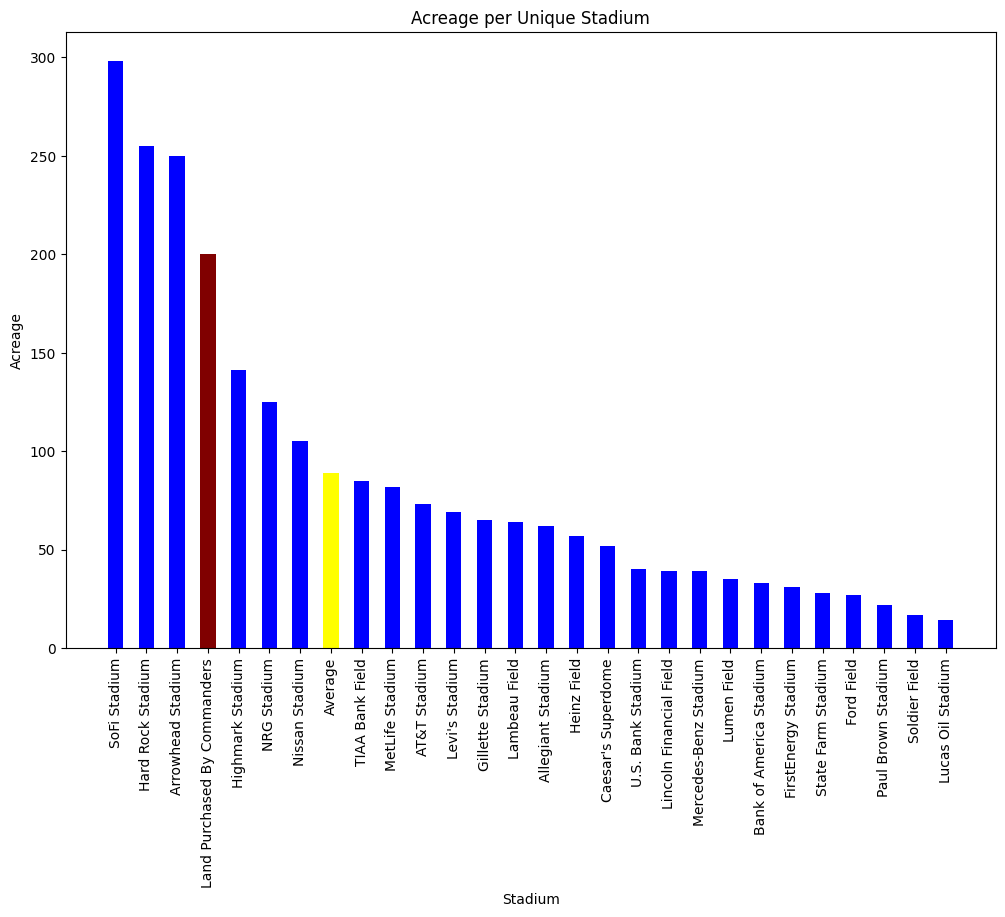

In [ ]:

# Calculate the average acreage
average_acreage = stadiums_df[stadiums_df['Team'] != 'Washington Commanders']['Acreage'].mean()
stadiums_df = stadiums_df[stadiums_df['Stadium'] != 'FedExField']
stadiums_df = stadiums_df[stadiums_df['Team'] != 'Los Angeles Chargers']
stadiums_df = stadiums_df[stadiums_df['Team'] != 'New York Jets']
# Add a column for the number of stadiums
stadiums_df['Stadium Count'] = 1

# Group the DataFrame by stadium and team and calculate the total acreage and number of stadiums
grouped_df = stadiums_df.groupby(['Stadium', 'Team'], as_index=False).agg({'Acreage': 'sum', 'Stadium Count': 'sum'})

# Calculate the average acreage per stadium
grouped_df['Average Acreage'] = grouped_df['Acreage'] / grouped_df['Stadium Count']

# Add a row for the average acreage
average_row = pd.DataFrame({'Stadium': 'Average', 'Acreage': average_acreage, 'Stadium Count': ''}, index=[len(grouped_df)])
grouped_df = pd.concat([grouped_df, average_row], ignore_index=True)

# Add row for new purchase 
new_purchase = pd.DataFrame({'Stadium': 'Land Purchased By Commanders', 'Acreage': 200, 'Stadium Count': ''}, index=[len(grouped_df)])
grouped_df = pd.concat([grouped_df, new_purchase], ignore_index=True)

# Sort the DataFrame by acreage in descending order
sorted_df = grouped_df.sort_values(by=['Acreage'], ascending=False)

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(sorted_df['Stadium'], sorted_df['Acreage'], color='blue', width=0.5)
ax.bar('Land Purchased By Commanders', 200, color='maroon', width=0.5)
ax.bar('Average', average_acreage, color='yellow', width=0.5)
ax.set_xlabel('Stadium')
ax.set_ylabel('Acreage')
ax.set_title('Acreage per Unique Stadium')
ax.set_xticklabels(sorted_df['Stadium'], rotation=90)
ax.set_yticklabels([int(x) for x in ax.get_yticks()])
plt.show()

We found that the average NFL stadium takes up to 70 acres.

Now, lets take a look at potential sites/available land properties near DC. We will use data of 18 different land properties with considerable land size to build an NFL stadium. 

In [8]:
land_df = pd.read_csv('available_land_data.csv')
land_df


,State,County,City,Address,Acres,Type,distance_from_dc
0,VA,Fairfax County,Oakton,10728 Vale Rd,23.69,undeveloped,20.8
1,VA,Fairfax County,Great Falls,10509 Beach Mill Rd,21.24,residential,21.5
2,MD,Prince George's County,Fort Washington,11308-11406 Indian Head Highway,30.70,residential,15.2
3,VA,Fairfax County,Great Falls,Utterback Shore Rd,68.78,undeveloped,21.3
4,VA,Loudoun County,Leesburg,James Monroe Hwy,371.80,undeveloped,39.5
5,VA,Fairfax County,Great Falls,439 A Springvale Rd,50.03,undeveloped,20.7
6,VA,Loudoun County,Leesburg,22485 Evergreen Mills Road,68.04,undeveloped,35.1
7,VA,Loudoun County,Leesburg,Loyalty Road,140.48,undeveloped,49.8
8,VA,Prince William County,Nokesville,9950 Alydar Ct,73.20,residential,42.9
9,VA,Prince William County,Manassas,12405 PURCELL ROAD,40.81,undeveloped,33.8


Here we read in the available land data and displayed it to get a general sense of what kind of information we have.

In [13]:
#Since we found that Virginia would be the best state to build the stadium, lets only include sites in Virginia
land_va_df = land_df.loc[land_df['State'] == "VA"]
land_va_df

,State,County,City,Address,Acres,Type,distance_from_dc
0,VA,Fairfax County,Oakton,10728 Vale Rd,23.69,undeveloped,20.8
1,VA,Fairfax County,Great Falls,10509 Beach Mill Rd,21.24,residential,21.5
3,VA,Fairfax County,Great Falls,Utterback Shore Rd,68.78,undeveloped,21.3
4,VA,Loudoun County,Leesburg,James Monroe Hwy,371.80,undeveloped,39.5
5,VA,Fairfax County,Great Falls,439 A Springvale Rd,50.03,undeveloped,20.7
6,VA,Loudoun County,Leesburg,22485 Evergreen Mills Road,68.04,undeveloped,35.1
7,VA,Loudoun County,Leesburg,Loyalty Road,140.48,undeveloped,49.8
8,VA,Prince William County,Nokesville,9950 Alydar Ct,73.20,residential,42.9
9,VA,Prince William County,Manassas,12405 PURCELL ROAD,40.81,undeveloped,33.8
10,VA,Prince William County,Manassas,10528 PINEVIEW ROAD,45.74,undeveloped,34.6


Here, we filtered the data to only include properties in Virginia becasue we previously decided that based on our fan proportion data, Virginia would be the best fit for a new stadium. The resulting dataframe included 10 locations.

In [15]:
#Merge the land dataframe with the county dataframe to list the population
merged_df = pd.merge(land_va_df, vacounty_df[['ctyname', 'pop2023']], left_on='County', right_on='ctyname')
merged_df.drop('ctyname', axis=1, inplace=True)
merged_df

,State,County,City,Address,Acres,Type,distance_from_dc,pop2023
0,VA,Fairfax County,Oakton,10728 Vale Rd,23.69,undeveloped,20.8,1170883
1,VA,Fairfax County,Great Falls,10509 Beach Mill Rd,21.24,residential,21.5,1170883
2,VA,Fairfax County,Great Falls,Utterback Shore Rd,68.78,undeveloped,21.3,1170883
3,VA,Fairfax County,Great Falls,439 A Springvale Rd,50.03,undeveloped,20.7,1170883
4,VA,Loudoun County,Leesburg,James Monroe Hwy,371.80,undeveloped,39.5,453554
5,VA,Loudoun County,Leesburg,22485 Evergreen Mills Road,68.04,undeveloped,35.1,453554
6,VA,Loudoun County,Leesburg,Loyalty Road,140.48,undeveloped,49.8,453554
7,VA,Prince William County,Nokesville,9950 Alydar Ct,73.20,residential,42.9,506264
8,VA,Prince William County,Manassas,12405 PURCELL ROAD,40.81,undeveloped,33.8,506264
9,VA,Prince William County,Manassas,10528 PINEVIEW ROAD,45.74,undeveloped,34.6,506264


In order to help decide which location would be best, we decided that we would use three factors to determine where the new stadium would be built. Those three factors are the population of the county, the acerage, and the distance from Washington DC. In this dataset, we already have the acerage and the distance from DC. In order to get the population, we would need to merge this dataframe and the VA counties dataframe to incldue the population. We used the merge function from pandas to do combine the dataframes to our liking. 

Using multi-criteria decision analysis to find the best location

We found that the stadium should be based on three main factors: the population of the county, the acerage, and the distance from DC

In [49]:
#Set weights to show how important each chosen factor is to a new location
weight_pop = 0.5
weight_acres = 0.3
weight_distance = 0.2

#Calculate a score for each based on the weights
merged_df['score'] = (weight_pop * merged_df['pop2023']) + (weight_acres * merged_df['Acres']) + (weight_distance * (1 - merged_df['distance_from_dc']))

Here, we set the weights or level of importance of each factor in this decision. We decided that the population would be the most important, the acerage being the second most important, and the distance from dc as the least important. After setting the weights, we calculated a score for each location by multipying the weight we set by the value in each column/factor. For the distance from dc, we prefer the smaller number. Therefore, we made it negative by doing 1 - distance_from_dc before multiplying it by the weight.

In [51]:
#Sort the dataframe in order to see the best locations based on our calculated score 
merged_df_sorted = merged_df.sort_values(by='score', ascending=False)
merged_df_sorted

Here, we sorted the dataframe in order by score. This is to get an idea of the most suitable locations in order. 

In [53]:
#Calculate the best location
best_location = merged_df_sorted.iloc[0]
best_location

State                               VA
County                  Fairfax County
City                       Great Falls
Address             Utterback Shore Rd
Acres                            68.78
Type                       undeveloped
distance_from_dc                  21.3
pop2023                        1170883
score                       585458.074
Name: 2, dtype: object

Here, we found that the most suitable location would be in Fairfax County, Virginia. This piece of land is in the preffered county that we found would be best suitable. The land has 68.78 acres; which is perfect because it is right on the NFL average for a typical NFL Stadium including parking and other ammenities. It is also only 21.3 miles from DC.

## **Discussion** 

## **Limitations**

## **Conclusion**

From our work in this project, the main takeaway is that the best location for a potential new Washington Commanders stadium would be in Fairfax County, Virginia. Another takeaway is that there is available land with 68.78 acres which is more than enough for the Commanders to build their new stadium on. 